In [1]:
import numpy as np
import pandas as pd
import seaborn as  sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('E:\Data Science Projects\datasets\healthcare-dataset-stroke-data (1).csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.shape

(5110, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
obj_data =df.select_dtypes(include =['object'])
obj_data

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [8]:
obj_cols = obj_data.columns

for i in obj_cols :
    print(i,'\n')
    print(obj_data[i].value_counts())

gender 

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
ever_married 

Yes    3353
No     1757
Name: ever_married, dtype: int64
work_type 

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Residence_type 

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
smoking_status 

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


Handling Missing values:

In [9]:
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=5)
df['bmi'] =imp.fit_transform(df[['bmi']])

In [10]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Exploratory Data Analysis

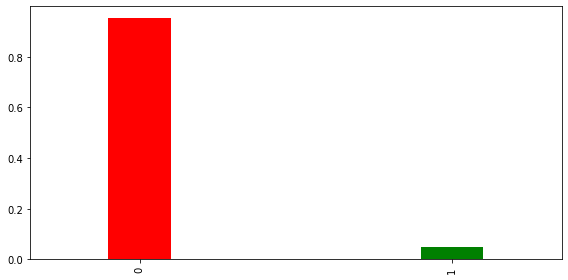

In [11]:
fig,axes  =plt.subplots(figsize =(8,4))
df['stroke'].value_counts(normalize='True').plot.bar(width =0.2,color =('red','green'))
plt.tight_layout()
plt.show()

In [12]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [13]:
num_data = df.select_dtypes(include=['int64','float64'])
num_data

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.600000,1
1,51676,61.0,0,0,202.21,28.893237,1
2,31112,80.0,0,1,105.92,32.500000,1
3,60182,49.0,0,0,171.23,34.400000,1
4,1665,79.0,1,0,174.12,24.000000,1
...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.893237,0
5106,44873,81.0,0,0,125.20,40.000000,0
5107,19723,35.0,0,0,82.99,30.600000,0
5108,37544,51.0,0,0,166.29,25.600000,0


In [14]:
num_data = num_data.drop(columns=df[['id','stroke']])


In [15]:
num_data

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,228.69,36.600000
1,61.0,0,0,202.21,28.893237
2,80.0,0,1,105.92,32.500000
3,49.0,0,0,171.23,34.400000
4,79.0,1,0,174.12,24.000000
...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237
5106,81.0,0,0,125.20,40.000000
5107,35.0,0,0,82.99,30.600000
5108,51.0,0,0,166.29,25.600000


Lets see how data is distributed in every columns

In [16]:
# plt.figure(figsize=(20,30),facecolor='white')
# plotnumber =1

# num_cols =num_data.columns

# for column in num_cols:
#     if plotnumber <= 15 :
#         ax = plt.subplot(5,3,plotnumber )
#         sns.distplot(num_cols[column])
#         plt.xlabel(column,fontsize =20)
        
# plotnumber+=1
# plt.tight_layout()

gender
ever_married
work_type
Residence_type
smoking_status


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

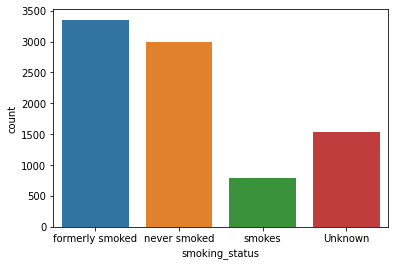

In [17]:
for i in obj_cols:
    print(i)
    sns.countplot(obj_data[i])

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywor

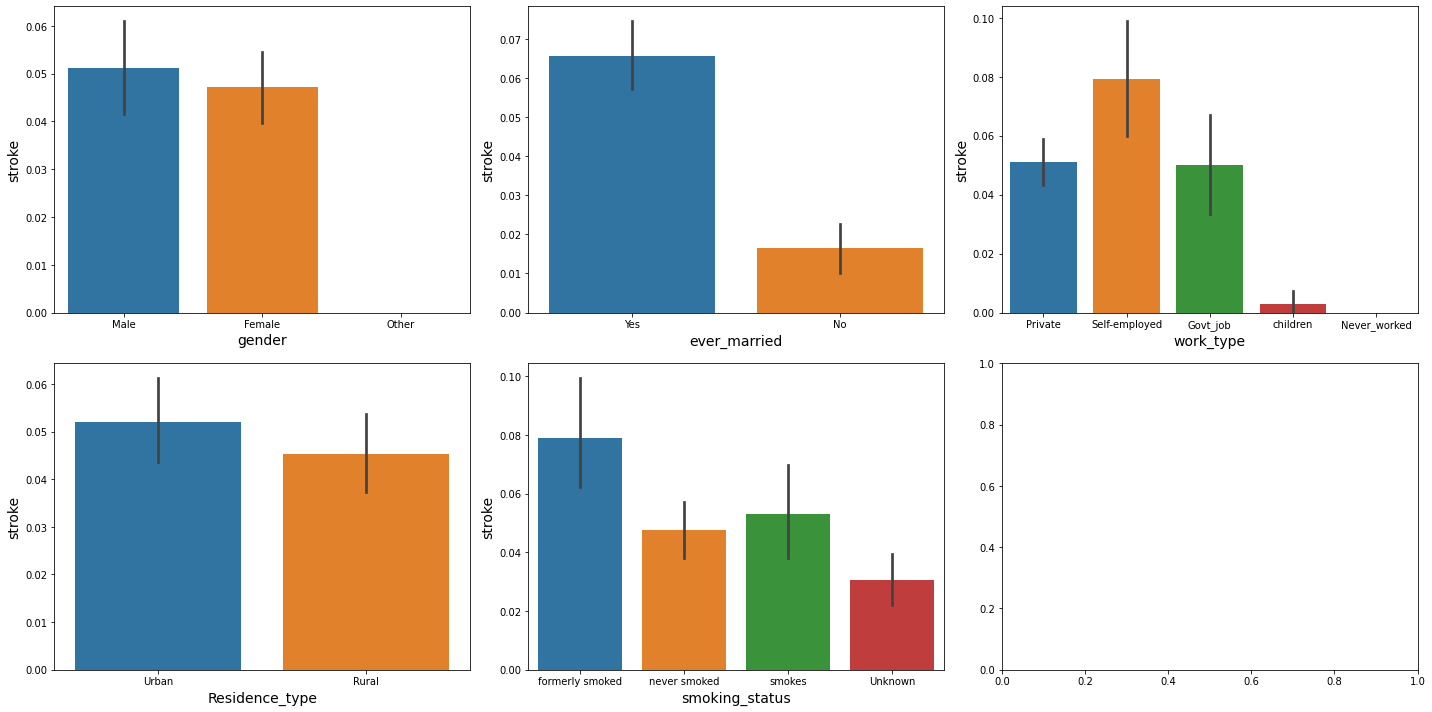

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
axes = [ax for axes_row in axes for ax in axes_row]
target = 'stroke'

for i, c in enumerate(obj_data):
    sns.barplot(df[c], df[target], ax=axes[i])
    axes[i].set_ylabel('stroke', fontsize=14)
    axes[i].set_xlabel(c, fontsize=14)
    
plt.tight_layout()
plt.show()


In [19]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [21]:
lr = LogisticRegression()
svc =SVC(kernel='linear')
knn =KNeighborsClassifier()
rf=RandomForestClassifier()

In [22]:
models=[lr,svc,knn,rf]

In [24]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [26]:
obj_data.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [28]:
obj_cols= obj_data.columns

for i in obj_cols:
    print(i)
    print(obj_data[i].value_counts())

gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [30]:
for i in obj_cols:
    obj_data[i]=le.fit_transform(obj_data[i])
    print(obj_data)

      gender ever_married      work_type Residence_type   smoking_status
0          1          Yes        Private          Urban  formerly smoked
1          0          Yes  Self-employed          Rural     never smoked
2          1          Yes        Private          Rural     never smoked
3          0          Yes        Private          Urban           smokes
4          0          Yes  Self-employed          Rural     never smoked
...      ...          ...            ...            ...              ...
5105       0          Yes        Private          Urban     never smoked
5106       0          Yes  Self-employed          Urban     never smoked
5107       0          Yes  Self-employed          Rural     never smoked
5108       1          Yes        Private          Rural  formerly smoked
5109       0          Yes       Govt_job          Urban          Unknown

[5110 rows x 5 columns]
      gender  ever_married      work_type Residence_type   smoking_status
0          1             

In [31]:
obj_data.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,1,1,2,1,1
1,0,1,3,0,2
2,1,1,2,0,2
3,0,1,2,1,3
4,0,1,3,0,2


In [32]:
data = pd.concat([obj_data,num_data],axis=0)

In [33]:
data.head()

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1.0,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
1,0.0,1.0,3.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,2.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
3,0.0,1.0,2.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN
4,0.0,1.0,3.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10220 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   float64
 1   ever_married       5110 non-null   float64
 2   work_type          5110 non-null   float64
 3   Residence_type     5110 non-null   float64
 4   smoking_status     5110 non-null   float64
 5   age                5110 non-null   float64
 6   hypertension       5110 non-null   float64
 7   heart_disease      5110 non-null   float64
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
dtypes: float64(10)
memory usage: 878.3 KB


In [35]:
data.isnull().sum()

gender               5110
ever_married         5110
work_type            5110
Residence_type       5110
smoking_status       5110
age                  5110
hypertension         5110
heart_disease        5110
avg_glucose_level    5110
bmi                  5110
dtype: int64

In [37]:
for i in df.columns:
    df[i]=le.fit_transform(df[i])
    print(df)

        id  gender   age  hypertension  heart_disease ever_married  \
0      671    Male  67.0             0              1          Yes   
1     3610  Female  61.0             0              0          Yes   
2     2151    Male  80.0             0              1          Yes   
3     4226  Female  49.0             0              0          Yes   
4      114  Female  79.0             1              0          Yes   
...    ...     ...   ...           ...            ...          ...   
5105  1312  Female  80.0             1              0          Yes   
5106  3100  Female  81.0             0              0          Yes   
5107  1396  Female  35.0             0              0          Yes   
5108  2601    Male  51.0             0              0          Yes   
5109  3089  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level        bmi  \
0           Private          Urban             228.69  36.600000   
1     Self-employed    

In [38]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,671,1,88,0,1,1,2,1,3850,240,1,1
1,3610,0,82,0,0,1,3,0,3588,162,2,1
2,2151,1,101,0,1,1,2,0,2483,199,2,1
3,4226,0,70,0,0,1,2,1,3385,218,3,1
4,114,0,100,1,0,1,3,0,3394,113,2,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 5110 non-null   int64
 1   gender             5110 non-null   int32
 2   age                5110 non-null   int64
 3   hypertension       5110 non-null   int64
 4   heart_disease      5110 non-null   int64
 5   ever_married       5110 non-null   int32
 6   work_type          5110 non-null   int32
 7   Residence_type     5110 non-null   int32
 8   avg_glucose_level  5110 non-null   int64
 9   bmi                5110 non-null   int64
 10  smoking_status     5110 non-null   int32
 11  stroke             5110 non-null   int64
dtypes: int32(5), int64(7)
memory usage: 379.4 KB


In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [44]:
X =df.drop(columns=['stroke'],axis=1)

In [45]:
X_scaled = scaler.fit_transform(X)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [51]:
lr = LogisticRegression()
svc = SVC(kernel='linear')
knn =KNeighborsClassifier()
rf = RandomForestClassifier()

In [52]:
models =[lr,svc,knn,rf]

In [54]:
y = df['stroke']

In [56]:
X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.3,stratify=y,random_state=32)

In [57]:
X_train_scaled =scaler.fit_transform(X_tr)
X_test_scaled = scaler.transform(X_te)

In [59]:
def cmp_model():
    for model in models:
        model.fit(X_tr,y_tr)
        pred=model.predict(X_te)
        
        accuracy=accuracy_score(y_te,pred) 
        
        print('Accuracy Score of the model :',model ,'=',accuracy)       

In [60]:
cmp_model()

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score of the model : LogisticRegression() = 0.9510763209393346
Accuracy Score of the model : SVC(kernel='linear') = 0.943900848010437
Accuracy Score of the model : KNeighborsClassifier() = 0.9452054794520548
Accuracy Score of the model : RandomForestClassifier() = 0.949119373776908


In [62]:
def cmp_cv():
    for model in models:
        cv_score = cross_val_score(model,X,y,cv=9)
        mean_accuracy = cv_score.mean()
        mean_accuracy = mean_accuracy*100
        mean_accuracy = round(mean_accuracy,2)
        
    print('Cross Validation accuracies for ', model, '=  ', cv_score)
    print('Accuracy % of the ', model, mean_accuracy)
    print('----------------------------------------------')

In [63]:
cmp_cv

<function __main__.cmp_cv()>

In [65]:
cmp_cv.best_parameters_

AttributeError: 'function' object has no attribute 'best_parameters_'

In [66]:
param = {
    'kernel':['linear','poly','rbf','sigmoid'],
    'C':[2,5,8,10]
}

In [67]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [68]:
clf_grid = GridSearchCV(svc,param,cv=5)
clf_rand = RandomizedSearchCV(svc,param,cv=5)

In [69]:
clf_grid.fit(X,y)
clf_rand.fit(X,y)

In [ ]:
print(clf_grid.results_)
print(clf_grid.best_params_)
print(clf_grid.best_score_)

In [ ]:
result =pd.DataFrame(clf_grid.cv_results_)